In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense, Flatten,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [ ]:
import zipfile

with zipfile.ZipFile(extract_path, 'r') as zip_ref:
    zip_ref.extractall("/content/animal_dataset")

# Update the paths to the extracted directories
cat_dir = os.path.join("/content/animal_dataset", "cats_set")
dog_dir = os.path.join("/content/animal_dataset", "dogs_set")

NameError: name 'extract_path' is not defined

In [ ]:
IMG_SIZE = (64, 64)
data = []
labels = []
extract_path = r"/content/animal dataset.zip"
# Paths to cats and dogs directories
cat_dir = os.path.join(extract_path, "/content/animal_dataset/cats_set")
dog_dir = os.path.join(extract_path, "/content/animal_dataset/dogs_set")

In [ ]:
# Load cats
for img_name in os.listdir(cat_dir)[:500]:  # limit to 100
    img_path = os.path.join(cat_dir, img_name)
    img = load_img(img_path, target_size=IMG_SIZE)
    img_array = img_to_array(img).flatten() / 255.0  # normalize
    data.append(img_array)
    labels.append(0)  # Cat = 0

In [ ]:
# Load dogs
for img_name in os.listdir(dog_dir)[:500]:
    img_path = os.path.join(dog_dir, img_name)
    img = load_img(img_path, target_size=IMG_SIZE)
    img_array = img_to_array(img).flatten() / 255.0
    data.append(img_array)
    labels.append(1)  # Dog = 1

In [ ]:
data = np.array(data)
labels = np.array(labels)

print("Data shape:", data.shape)  # (200, 12288)
print("Labels shape:", labels.shape)  # (200,)

Data shape: (1000, 12288)
Labels shape: (1000,)


In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, stratify=labels
)

# One-hot encoding
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (800, 12288) (800, 2)
Testing set: (200, 12288) (200, 2)


In [ ]:
X_train,y_train


(array([[0.2627451 , 0.1882353 , 0.19607843, ..., 0.6862745 , 0.5254902 ,
         0.4392157 ],
        [0.3764706 , 0.33333334, 0.30980393, ..., 0.49411765, 0.4392157 ,
         0.40392157],
        [0.89411765, 0.83137256, 0.87058824, ..., 0.6039216 , 0.5803922 ,
         0.627451  ],
        ...,
        [0.40392157, 0.5019608 , 0.47843137, ..., 0.25882354, 0.32156864,
         0.41960785],
        [0.10196079, 0.10196079, 0.10196079, ..., 0.34117648, 0.27450982,
         0.16470589],
        [0.21176471, 0.20392157, 0.20784314, ..., 0.43137255, 0.42745098,
         0.31764707]], dtype=float32),
 array([[0., 1.],
        [1., 0.],
        [0., 1.],
        ...,
        [0., 1.],
        [1., 0.],
        [0., 1.]]))

In [ ]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(data.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # Output layer for Cat/Dog
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │     3,145,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,187,266 (12.16 MB)

 Trainable params: 3,187,266 (12.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.4547 - loss: 2.4791 - val_accuracy: 0.5188 - val_loss: 1.1447
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5118 - loss: 0.9101 - val_accuracy: 0.5437 - val_loss: 0.6886
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5152 - loss: 0.7350 - val_accuracy: 0.4812 - val_loss: 0.8335
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5699 - loss: 0.7373 - val_accuracy: 0.5375 - val_loss: 0.6977
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.5301 - loss: 0.7395 - val_accuracy: 0.5250 - val_loss: 0.7054
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6325 - loss: 0.6345 - val_accuracy: 0.4875 - val_loss: 0.7971
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.5740 - loss: 0.7386 - val_accuracy: 0.5250 - val_loss: 0.7713
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5656 - loss: 0.7544 - val_accuracy: 0.5250 - v

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5772 - loss: 0.7776
Test Accuracy: 0.5600


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


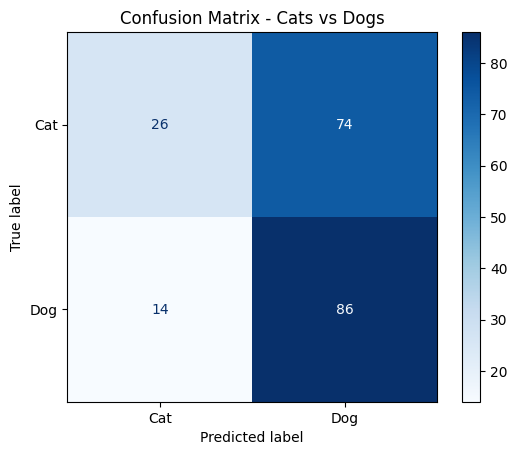

In [ ]:
# Predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Cat", "Dog"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Cats vs Dogs")
plt.show()


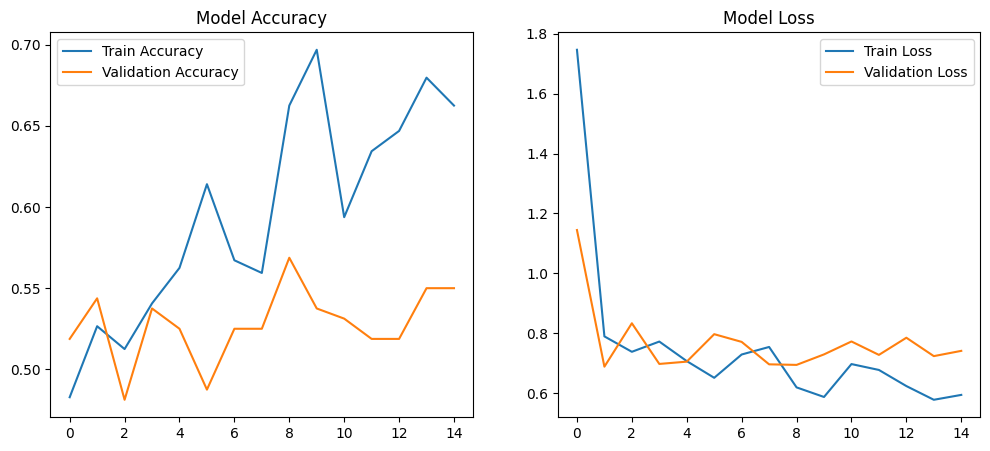

In [ ]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [ ]:
model = Sequential([
    # Convolution + Pooling
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Output layer for 2 classes
])

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 683,458 (2.61 MB)

 Trainable params: 683,458 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Reshape data for CNN
X_train = X_train.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 3)
X_test = X_test.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 3)

print("Training set reshaped:", X_train.shape, y_train.shape)
print("Testing set reshaped:", X_test.shape, y_test.shape)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_split=0.2
)


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

In [ ]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = load_img(img_path, target_size=IMG_SIZE)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    classes = ["Cat", "Dog"]
    print(f"Prediction: {classes[np.argmax(prediction)]}")

# Example: Predict first image from cat directory
sample_img = os.path.join(cat_dir, os.listdir(cat_dir)[0])
predict_image(sample_img)
